## Loan Prediction Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
% matplotlib inline

C:\Users\lrspe\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Load and View Data

In [5]:
train = pd.read_csv("https://www.dropbox.com/s/fa0y3k8a5yyun1q/train.csv?dl=1")
test = pd.read_csv("https://www.dropbox.com/s/vibx2crbishj2qe/test.csv?dl=1")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.loc[train['Loan_Status'] == 'Y', 'Loan_Status'] = 1
train.loc[train['Loan_Status'] == 'N', 'Loan_Status'] = 0

In [7]:
train.shape

(614, 13)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


## Missing Values

In [10]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Quick EDA

Learn about the data! For each variable, explore frequency, distribution and correlation.

C:\Users\lrspe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


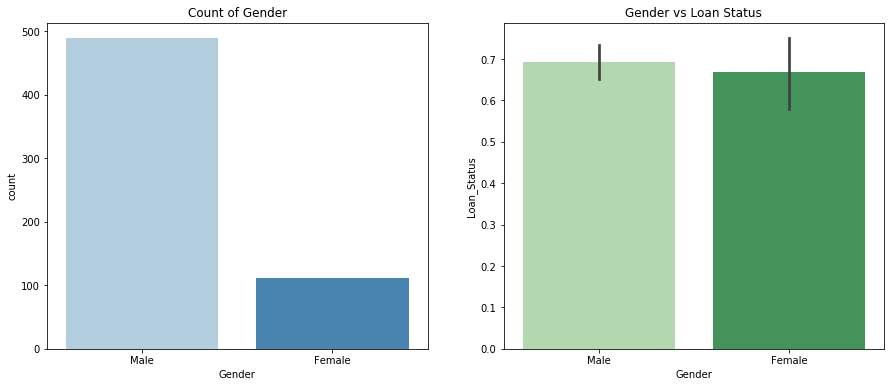

In [12]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Count of Gender")
ax[1].set_title("Gender vs Loan Status")
sns.countplot(x="Gender", data=train, palette="Blues", ax = ax[0]);
sns.barplot(x='Gender', y='Loan_Status', data=train, palette="Greens", ax=ax[1]);

C:\Users\lrspe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


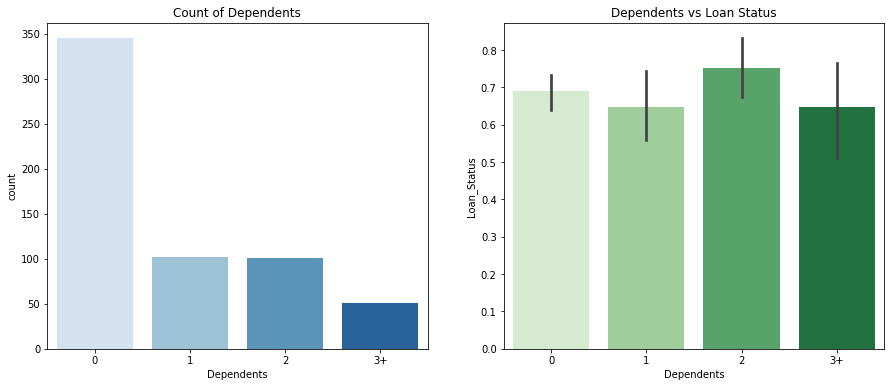

In [13]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Count of Dependents")
ax[1].set_title("Dependents vs Loan Status")
sns.countplot(x="Dependents", data=train, palette="Blues", ax = ax[0]);
sns.barplot(x='Dependents', y='Loan_Status', data=train, palette="Greens", ax=ax[1]);

C:\Users\lrspe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


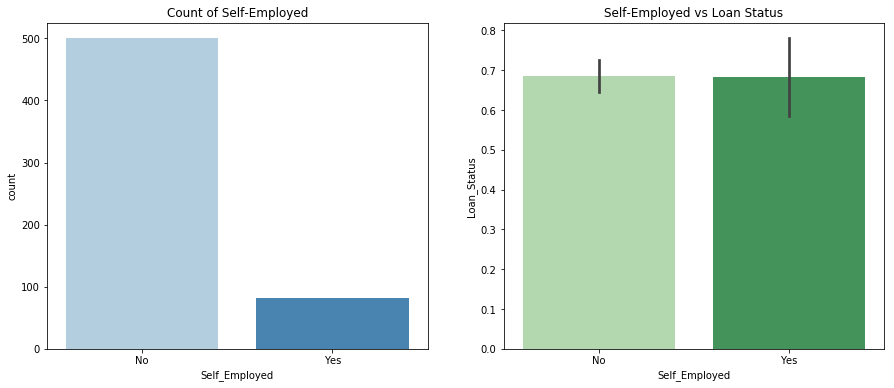

In [14]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Count of Self-Employed")
ax[1].set_title("Self-Employed vs Loan Status")
sns.countplot(x="Self_Employed", data=train, palette="Blues", ax = ax[0]);
sns.barplot(x='Self_Employed', y='Loan_Status', data=train, palette="Greens", ax=ax[1]);

C:\Users\lrspe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


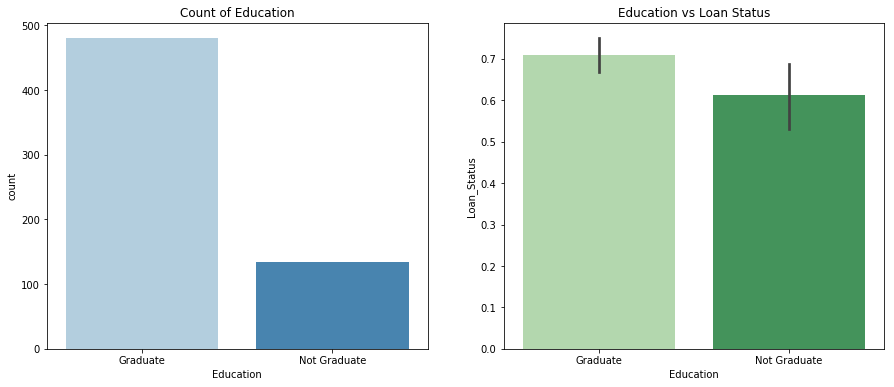

In [15]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Count of Education")
ax[1].set_title("Education vs Loan Status")
sns.countplot(x="Education", data=train, palette="Blues", ax = ax[0]);
sns.barplot(x='Education', y='Loan_Status', data=train, palette="Greens", ax=ax[1]);

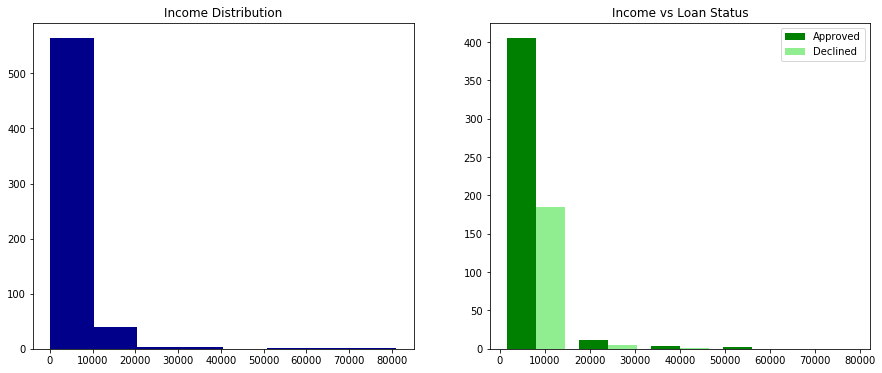

In [16]:
fx, axes = plt.subplots(1,2,figsize=(15,6))
train['ApplicantIncome'].hist(grid=False, bins=8, color="DarkBlue", ax=axes[0]).set_title("Income Distribution");

approved = train[train.Loan_Status == 1].ApplicantIncome
declined = train[train.Loan_Status == 0].ApplicantIncome

axes[1].set_title("Income vs Loan Status")
axes[1].hist([approved, declined], bins=5, range=(0, 80000), label=['Approved', 'Declined'], color=['Green', 'lightgreen'])
axes[1].legend()
plt.show()

C:\Users\lrspe\Anaconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lrspe\Anaconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


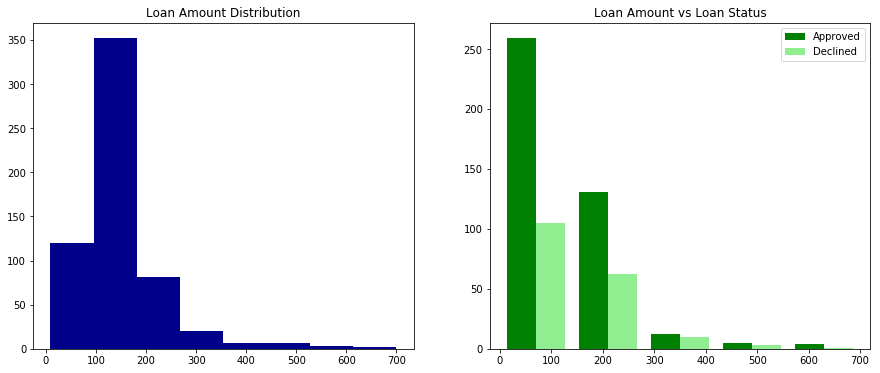

In [17]:
fx, axes = plt.subplots(1,2,figsize=(15,6))
train['LoanAmount'].hist(grid=False, bins=8, color="DarkBlue", ax=axes[0]).set_title("Loan Amount Distribution");

approved = train[train.Loan_Status == 1].LoanAmount
declined = train[train.Loan_Status == 0].LoanAmount

axes[1].set_title("Loan Amount vs Loan Status")
axes[1].hist([approved, declined], bins=5, range=(0, 700), label=['Approved', 'Declined'], color=['Green', 'lightgreen'])
axes[1].legend()
plt.show()

C:\Users\lrspe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


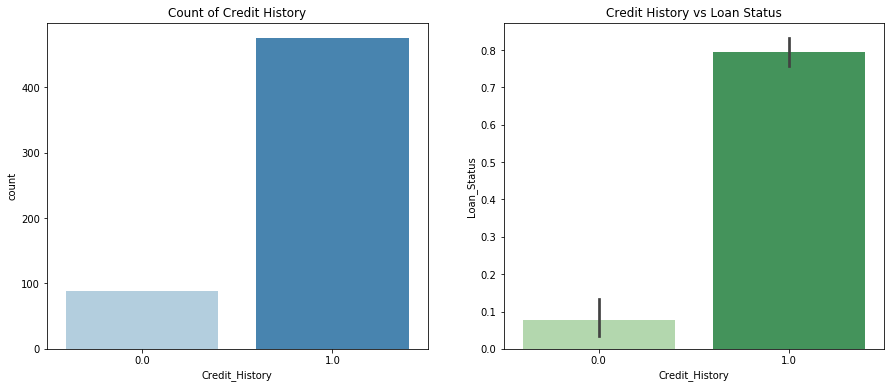

In [18]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Count of Credit History")
ax[1].set_title("Credit History vs Loan Status")
sns.countplot(x="Credit_History", data=train, palette="Blues", ax = ax[0]);
sns.barplot(x='Credit_History', y='Loan_Status', data=train, palette="Greens", ax=ax[1]);

C:\Users\lrspe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


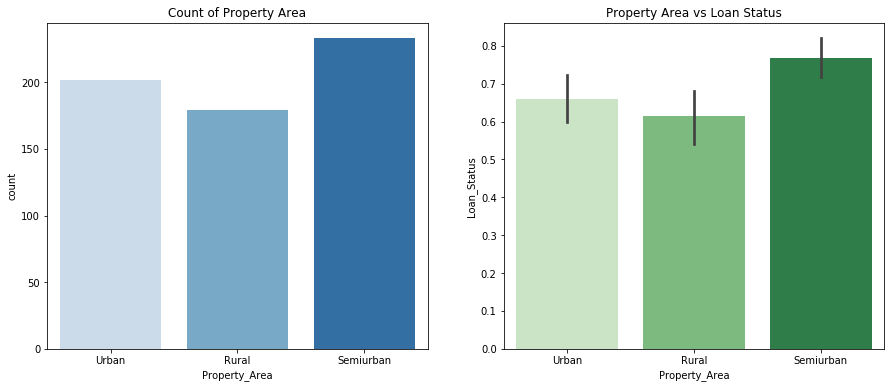

In [19]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].set_title("Count of Property Area")
ax[1].set_title("Property Area vs Loan Status")
sns.countplot(x="Property_Area", data=train, palette="Blues", ax = ax[0]);
sns.barplot(x="Property_Area", y='Loan_Status', data=train, palette="Greens", ax=ax[1]);

## Building the Predictive Model

### Fill Missing Data

In [20]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [21]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

In [22]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [23]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(), inplace=True)

## Label Encoder - Convert categorical variables to numeric

In [24]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])
train.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])
test.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [26]:
# categorical variables are now encoded
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [27]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [28]:
# Create the target (y) and features (X) numpy arrays: 
X = train[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]].values
y = train['Loan_Status'].values


# build and fit the random forest classifer (rfc)
rfc = RandomForestClassifier(max_depth = 10, min_samples_split = 2, n_estimators = 100, random_state = 1)
forest = rfc.fit(X, y)

# print the score of the fitted random forest classifier
print(forest.score(X, y))

0.9250814332247557


In [29]:
# making the prediction - first extract test features
X_test = test[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]].values

# make prediction using the test dataset
prediction_rfc = forest.predict(X_test)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
forest_solution = pd.DataFrame(prediction_rfc, columns = ["Loan_Status"])
forest_solution.head()

,Loan_Status
0,1
1,1
2,1
3,1
4,1


In [30]:
forest_solution.to_csv("prediction.csv", columns=['Loan_Status'])

In [31]:
forest.feature_importances_

array([0.01369898, 0.02714829, 0.04109398, 0.02307763, 0.01696435,
       0.17606961, 0.10977489, 0.16091156, 0.04921392, 0.33742674,
       0.04462004])

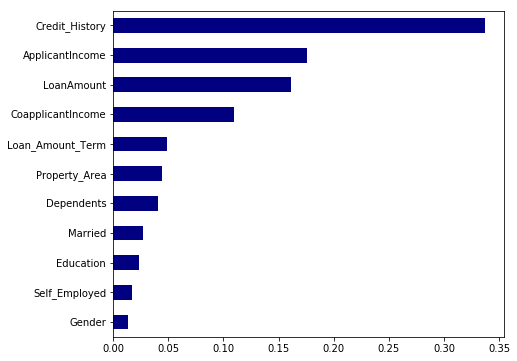

In [33]:
feature_importances = pd.Series(forest.feature_importances_, index=["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"])
feature_importances.sort_values(ascending=True).plot(kind="barh", color="navy", figsize=(7,6));

## Result

Credit History was the most reliable indicator of loan approval within this dataset. Random Forest Classifier scored 0.925 accuracy on prediction. 